In [87]:
import numpy as np
import pandas as pd

df_train = pd.read_csv("titanic/train.csv")
df_test = pd.read_csv("titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.shape

In [ ]:
df_train.dtypes

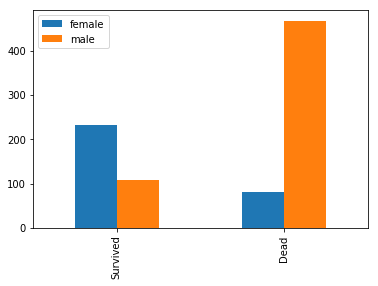

In [89]:
import matplotlib.pyplot as plt
#bar graph of sex vs survived

survived_sex = df_train[df_train['Survived']==1]['Sex'].value_counts()
dead_sex = df_train[df_train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot.bar()

/home/anshuman/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


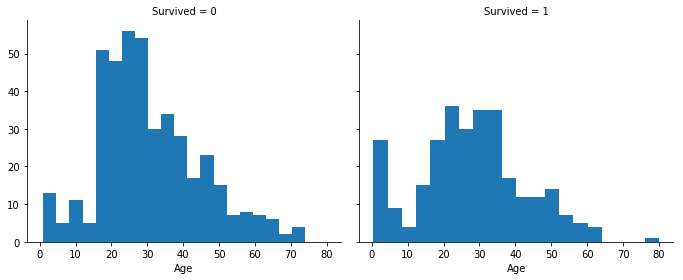

In [90]:
import seaborn as sns
#histogram of age vs survived
g = sns.FacetGrid(df_train, col='Survived',size=4,aspect=1.2)
g.map(plt.hist, 'Age', bins=20)

In [91]:
corr_matrix = df_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [92]:
for c in df_train.columns:
    print(c,np.sum(df_train[c].isnull()))

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [93]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [94]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

In [104]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [96]:
df_train.drop(['Cabin'], axis=1, inplace=True)
df_test.drop(['Cabin'], axis=1, inplace=True)

In [97]:
#in label encoding it is required that a column has data with some kind of order or hierarchy when we clearly don’t have it. To avoid this, we ‘OneHotEncode’ that column.

df_train = pd.get_dummies(df_train, columns=['Sex','Embarked'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['Sex','Embarked'], drop_first=True)


In [98]:
df_train.drop(['Ticket','Name'],axis=1,inplace=True)
df_test.drop(['Ticket','Name'],axis=1,inplace=True)

In [99]:
X = df_train.drop(['Survived'],axis=1)
Y = df_train['Survived']

In [100]:
Y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#1st model

kNNclassifier = KNeighborsClassifier(n_neighbors=7)
kNNclassifier.fit(X, Y)
scores_1 = cross_val_score(kNNclassifier, X, Y, cv=5)
print(scores_1)

[0.62011173 0.46927374 0.4494382  0.51123596 0.65536723]


In [68]:

scores_4 = cross_val_score(kNNclassifier, X, Y, cv=5,scoring='precision')
print(scores_4)

[0.66666667 0.38983051 0.34042553 0.4040404  0.88888889]


In [64]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,Y)
scores_2 = cross_val_score(decision_tree, X, Y, cv=5)
print(scores_2)

[0.60893855 0.77094972 0.79775281 0.7752809  0.84745763]


In [69]:
scores_5 = cross_val_score(decision_tree, X, Y, cv=5,scoring='precision')
print(scores_5)

[0.4        0.75806452 0.76119403 0.73684211 0.86538462]


In [65]:
from sklearn.linear_model import LogisticRegression
logisticRegClassifier = LogisticRegression()
logisticRegClassifier.fit(X, Y)
scores_3 = cross_val_score(logisticRegClassifier, X, Y, cv=5)
print(scores_3)

[0.60893855 0.77094972 0.79775281 0.7752809  0.84745763]


In [70]:
scores_6 = cross_val_score(logisticRegClassifier, X, Y, cv=5,scoring='precision')
print(scores_6)

[0.8        0.7704918  0.71641791 0.73214286 0.77777778]


In [77]:
#tuning KNN, tuned neighbours
kNNclassifier = KNeighborsClassifier(n_neighbors=6)
kNNclassifier.fit(X, Y)
scores_1 = cross_val_score(kNNclassifier, X, Y, cv=5)
print(scores_1.mean())



0.5411042748973592


In [101]:
# max_depth: This indicates how deep the tree can be
# min_samples_split: This represents the minimum number of samples required to split an internal node
# min_samples_leaf: This indicates minimum number of samples required to be at a leaf node
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=10,min_samples_split=5,min_samples_leaf=5)
decision_tree.fit(X,Y)
scores_2 = cross_val_score(decision_tree, X, Y, cv=5)
print(scores_2.mean())

0.8114973223154799


In [86]:
#tuning Logistic Regression penalty='l2',solver='liblinear',class_weight='balanced'

from sklearn.linear_model import LogisticRegression
logisticRegClassifier = LogisticRegression()
logisticRegClassifier.fit(X, Y)
scores_3 = cross_val_score(logisticRegClassifier, X, Y, cv=5)
print(scores_3.mean())

0.7946056563846844


In [106]:
from sklearn.metrics import accuracy_score

Y_pred = logisticRegClassifier.predict(df_test)
out = pd.DataFrame([df_test['PassengerId'],Y_pred])
out.head()

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Unnamed 0,0,0,0,0,1,0,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0


In [105]:
for c in df_test.columns:
    print(c,np.sum(df_test[c].isnull()))

PassengerId 0
Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0
Sex_male 0
Embarked_Q 0
Embarked_S 0
